Step 1. Load the Dataset and Perform Initial Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Telco Churn Dataset

data = pd.read_csv(r"Telco-Customer-Churn.csv")
data.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
995,3842-IYKUE,Female,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),85.3,2917.5,Yes


In [3]:
data.columns = data.columns.str.lower() # this will keep all the columns in lowercase
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


Step 2. Data Preprocessing

In [4]:
# Dropping customerID as it is not useful for the analysis
data = data.drop(['customerid'], axis=1)

In [5]:
# Handle missing values (if any)
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')
data = data.fillna(data['totalcharges'].mean())  # Fill missing TotalCharges with mean

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [7]:
for col in data.columns:
    print(f"These are the unique values in {col}:")
    print(data[col].unique())
    print(" ")

These are the unique values in gender:
['Female' 'Male']
 
These are the unique values in seniorcitizen:
[0 1]
 
These are the unique values in partner:
['Yes' 'No']
 
These are the unique values in dependents:
['No' 'Yes']
 
These are the unique values in tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 
These are the unique values in phoneservice:
['No' 'Yes']
 
These are the unique values in multiplelines:
['No phone service' 'No' 'Yes']
 
These are the unique values in internetservice:
['DSL' 'Fiber optic' 'No']
 
These are the unique values in onlinesecurity:
['No' 'Yes' 'No internet service']
 
These are the unique values in onlinebackup:
['Yes' 'No' 'No internet service']
 
These are the unique values in deviceprotection:
['No' 'Yes' 'No internet service']
 
These are the unique values in techsuppo

In [8]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns

for column in categorical_cols:
    if 'Yes' in data[column].unique():
        data[column] = data[column].replace({
            'Yes': 1,
            'No': 0,
            'No phone service': -1,        # Custom encoding for 'No phone service'
            'No internet service': -1      # Custom encoding for 'No internet service'
        })

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   int64  
 3   dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   int64  
 6   multiplelines     7043 non-null   int64  
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   int64  
 9   onlinebackup      7043 non-null   int64  
 10  deviceprotection  7043 non-null   int64  
 11  techsupport       7043 non-null   int64  
 12  streamingtv       7043 non-null   int64  
 13  streamingmovies   7043 non-null   int64  
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   int64  
 16  paymentmethod     7043 non-null   object 


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['gender_n']      = le.fit_transform(data['gender'])
data['internetService_n']    = le.fit_transform(data['internetservice'])
data['contract_n']  = le.fit_transform(data['contract'])
data['paymentmethod_n']    = le.fit_transform(data['paymentmethod'])

In [10]:
data_encoded = data.drop(['paymentmethod','contract','internetservice','gender'], axis=1)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seniorcitizen      7043 non-null   int64  
 1   partner            7043 non-null   int64  
 2   dependents         7043 non-null   int64  
 3   tenure             7043 non-null   int64  
 4   phoneservice       7043 non-null   int64  
 5   multiplelines      7043 non-null   int64  
 6   onlinesecurity     7043 non-null   int64  
 7   onlinebackup       7043 non-null   int64  
 8   deviceprotection   7043 non-null   int64  
 9   techsupport        7043 non-null   int64  
 10  streamingtv        7043 non-null   int64  
 11  streamingmovies    7043 non-null   int64  
 12  paperlessbilling   7043 non-null   int64  
 13  monthlycharges     7043 non-null   float64
 14  totalcharges       7043 non-null   float64
 15  churn              7043 non-null   int64  
 16  gender_n           7043 

In [11]:
"""# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])"""

data_encoded.head()


,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,gender_n,internetService_n,contract_n,paymentmethod_n
0,0,1,0,1,0,-1,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,2
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,1,3
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,3
3,0,0,0,45,0,-1,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,1,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,2


In [12]:
# Splitting data into features and target
X = data_encoded.drop('churn', axis=1)
y = data_encoded['churn']

In [13]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Step 3. Feature Engineering

In [14]:
# Build a basic RandomForest Classifier to get feature importance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

In [16]:
# Create a dataframe for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

              Feature  Importance
14       totalcharges    0.196138
13     monthlycharges    0.175231
3              tenure    0.154086
17         contract_n    0.087329
18    paymentmethod_n    0.050516
6      onlinesecurity    0.033864
9         techsupport    0.030793
16  internetService_n    0.030381
15           gender_n    0.028310
7        onlinebackup    0.028103


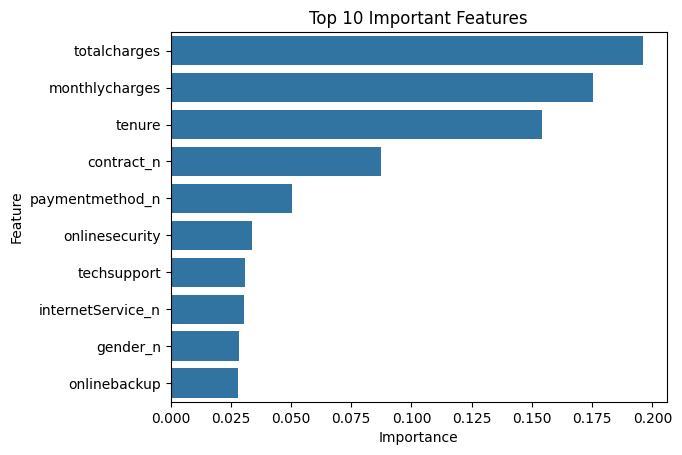

In [17]:
# Top 10 features
top_10_features = feature_importance_df.head(10)
print(top_10_features)

# Plot top 10 features
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title("Top 10 Important Features")
plt.show()


In [18]:
# Selecting the top 10 features
top_features = top_10_features['Feature'].values
x_train = X_train[top_features]
x_test = X_test[top_features]

In [19]:
y.value_counts()

,count
churn,
0,5174
1,1869


In [20]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [21]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)

# Resample the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
churn
0    3622
1    3622
Name: count, dtype: int64


In [22]:
# Scaling numeric features
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train_smote)
x_test = scaler.transform(x_test)

Step 4. Model Building

In [23]:
!pip install xgboost
import xgboost

In [24]:
# Now, let us define the models
models = {
    'Logistic Regression': LogisticRegression(C = 10, solver = 'liblinear'),
    'Random Forest': RandomForestClassifier(criterion = 'entropy', n_estimators = 100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XG Boost': xgboost.XGBClassifier(objective="binary:logistic", random_state=42)
}

# Also, we will initiate an empty dataframe to store our metrics
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Then, we will loop through the models to train, make predictions, and calculate the metrics
for model_name, model in models.items():
    # Training the model
    model.fit(x_train_smote, y_train_smote)

    # Predict
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # create dictionary with results
    results_dict = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Store metrics in results_df
    results_df = pd.concat([results_df, pd.DataFrame([results_dict])], ignore_index=True)
    # as at new release of pandas, the append function has been removed

# # Print out results dataframe
# print("\nMetrics Comparison")
# print(results_df)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.622811,0.384540,0.700535,0.496526
1,Random Forest,0.707052,0.467634,0.746881,0.575154
2,Gradient Boosting,0.739233,0.506684,0.675579,0.579068
3,XG Boost,0.725509,0.193548,0.010695,0.020270


In [25]:
# Using Logisitic Regression
log_model = LogisticRegression(C = 10, solver = 'liblinear')
log_model.fit(x_train_smote, y_train_smote)

y_predict = log_model.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(" ")
print(classification_report(y_test, y_predict))

[[923 629]
 [168 393]]
 
              precision    recall  f1-score   support

           0       0.85      0.59      0.70      1552
           1       0.38      0.70      0.50       561

    accuracy                           0.62      2113
   macro avg       0.62      0.65      0.60      2113
weighted avg       0.72      0.62      0.64      2113



In [28]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
# Hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(x_train_smote, y_train_smote)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
y_pred_tuned = grid_search.predict(x_test)
recall_tuned = recall_score(y_test, y_predict)

class_report = classification_report(y_test, y_predict)
print(class_report)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Recall after Random Forest tuning: 0.7005
              precision    recall  f1-score   support

           0       0.85      0.59      0.70      1552
           1       0.38      0.70      0.50       561

    accuracy                           0.62      2113
   macro avg       0.62      0.65      0.60      2113
weighted avg       0.72      0.62      0.64      2113



In [27]:
log_model = LogisticRegression()
# Hyperparameters for tuning
param_grid = {
    'penalty': ['l1','l2','elasticnet'],
    'solver': ['lbfgs','liblinear','sag'],
    'C':[1, 10]
}

# Initialize GridSearch
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, scoring='recall', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(x_train_smote, y_train_smote)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
y_pred_tuned = grid_search.predict(x_test)
recall_tuned = recall_score(y_test, y_predict)

class_report = classification_report(y_test, y_predict)
print(class_report)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Recall after Logistic Regression tuning: 0.7005


'              precision    recall  f1-score   support\n\n           0       0.85      0.59      0.70      1552\n           1       0.38      0.70      0.50       561\n\n    accuracy                           0.62      2113\n   macro avg       0.62      0.65      0.60      2113\nweighted avg       0.72      0.62      0.64      2113\n'